# Working with Regression Trees in Python

## Learning Objectives
Decision Trees are one of the most popular approaches to supervised machine learning. Decison Trees use an inverted tree-like structure to model the relationship between independent variables and a dependent variable. A tree with a continuous dependent variable is known as a **Regression Tree**. By the end of this tutorial, you will have learned:

+ How to import, explore and prepare data
+ How to build a Regression Tree model
+ How to visualize the structure of a Regression Tree
+ How to Prune a Regression Tree 

## 1. Collect the Data

In [126]:
import pandas as pd
income = pd.read_csv("income.csv")
income.head()

,Age,Education,Salary
0,25,Bachelors,43.9
1,30,Bachelors,54.4
2,45,Bachelors,62.5
3,55,Bachelors,72.5
4,65,Bachelors,74.6


## 2. Explore the Data

In [127]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        30 non-null     int64  
 1   Education  30 non-null     object 
 2   Salary     30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [128]:
income.describe()

,Age,Salary
count,30.000000,30.000000
mean,43.366667,64.406667
std,14.375466,26.202684
min,24.000000,16.800000
25%,30.500000,46.350000
50%,45.000000,62.100000
75%,55.000000,76.800000
max,65.000000,118.000000


In [129]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

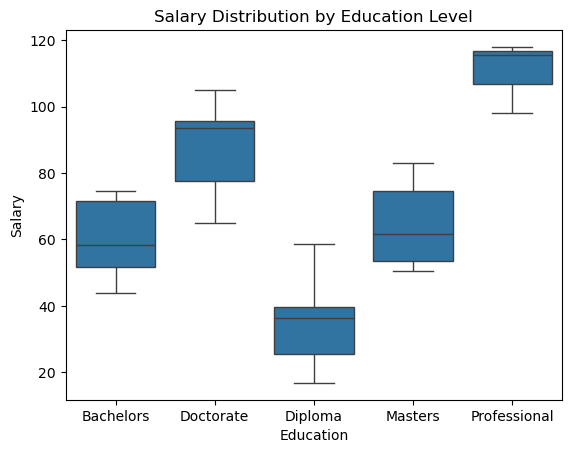

In [130]:
# Box plot of salary by education level
sns.boxplot(x='Education', y='Salary', data=income)
plt.title('Salary Distribution by Education Level')
plt.show()

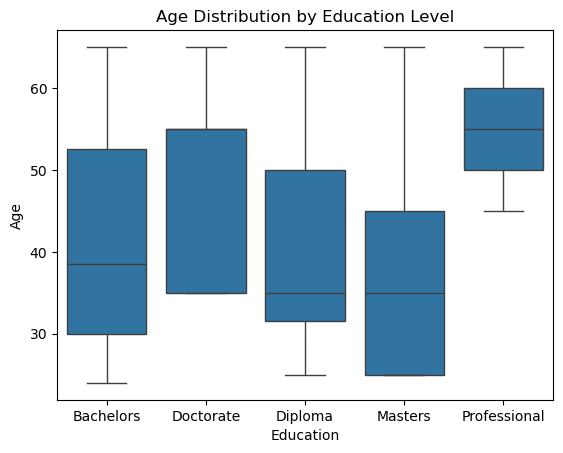

In [131]:
# Box plot of age by education level
sns.boxplot(x='Education', y='Age', data=income)
plt.title('Age Distribution by Education Level')
plt.show()

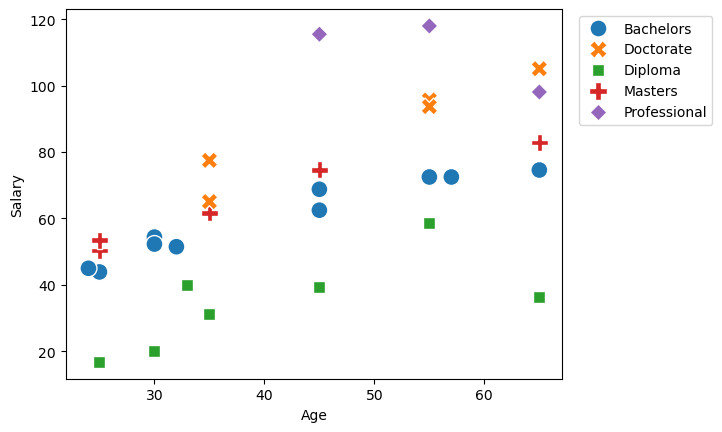

In [132]:
# Scatter plot of age vs. salary
ax = sns.scatterplot(data = income,
                     x = 'Age',
                     y = 'Salary',
                     hue = 'Education',
                     style = 'Education',
                     s = 150)
ax = plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')

## 3. Prepare the Data

In [133]:
y = income[['Salary']]

In [134]:
X = income[['Age', 'Education']]

In [135]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.6, stratify=X['Education'], random_state=1234
)

# Check the split data shapes
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (18, 2)
Test set size: (12, 2)


In [136]:
X_train = pd.get_dummies(X_train)
X_train.head()

,Age,Education_Bachelors,Education_Diploma,Education_Doctorate,Education_Masters,Education_Professional
0,25,True,False,False,False,False
16,45,False,False,False,True,False
17,65,False,False,False,True,False
29,65,False,False,False,False,True
8,25,False,True,False,False,False


In [137]:
X_test = pd.get_dummies(X_test)
X_test.head()

,Age,Education_Bachelors,Education_Diploma,Education_Doctorate,Education_Masters,Education_Professional
9,30,False,True,False,False,False
21,25,False,False,False,True,False
4,65,True,False,False,False,False
10,35,False,True,False,False,False
7,65,False,False,True,False,False


## 4. Train and Evaluate the Regression Tree

In [138]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 1234)

In [139]:
model = regressor.fit(X_train, y_train)

In [140]:
# Evaluate the model on the test set
model.score(X_test, y_test)

0.5853149222529794

In [141]:
from sklearn.metrics import mean_absolute_error

# Predict salary for the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Absolute Error
mean_absolute_error(y_test, y_test_pred)

13.541666666666666

## 5. Visualize the Regression Tree

Text(0.5, 1.0, 'Regression Tree for Salary Prediction')

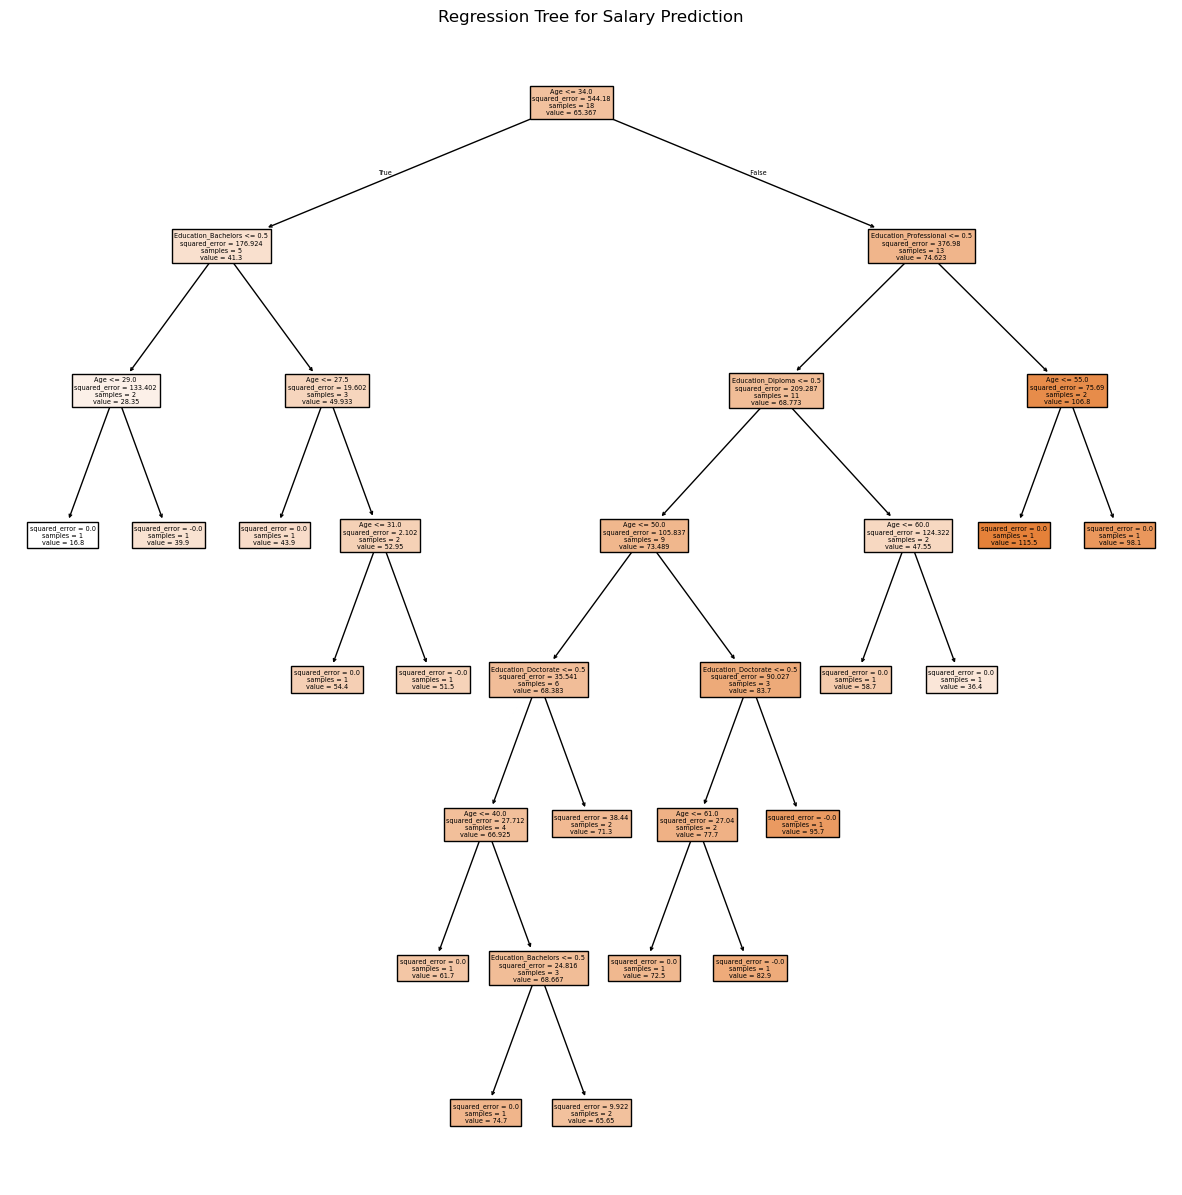

In [142]:
# Plot the regression tree
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(model,
                   feature_names = list(X_train.columns),
                   filled = True)
plt.title("Regression Tree for Salary Prediction")

Text(0.5, 1.0, 'Top Levels of Regression Tree')

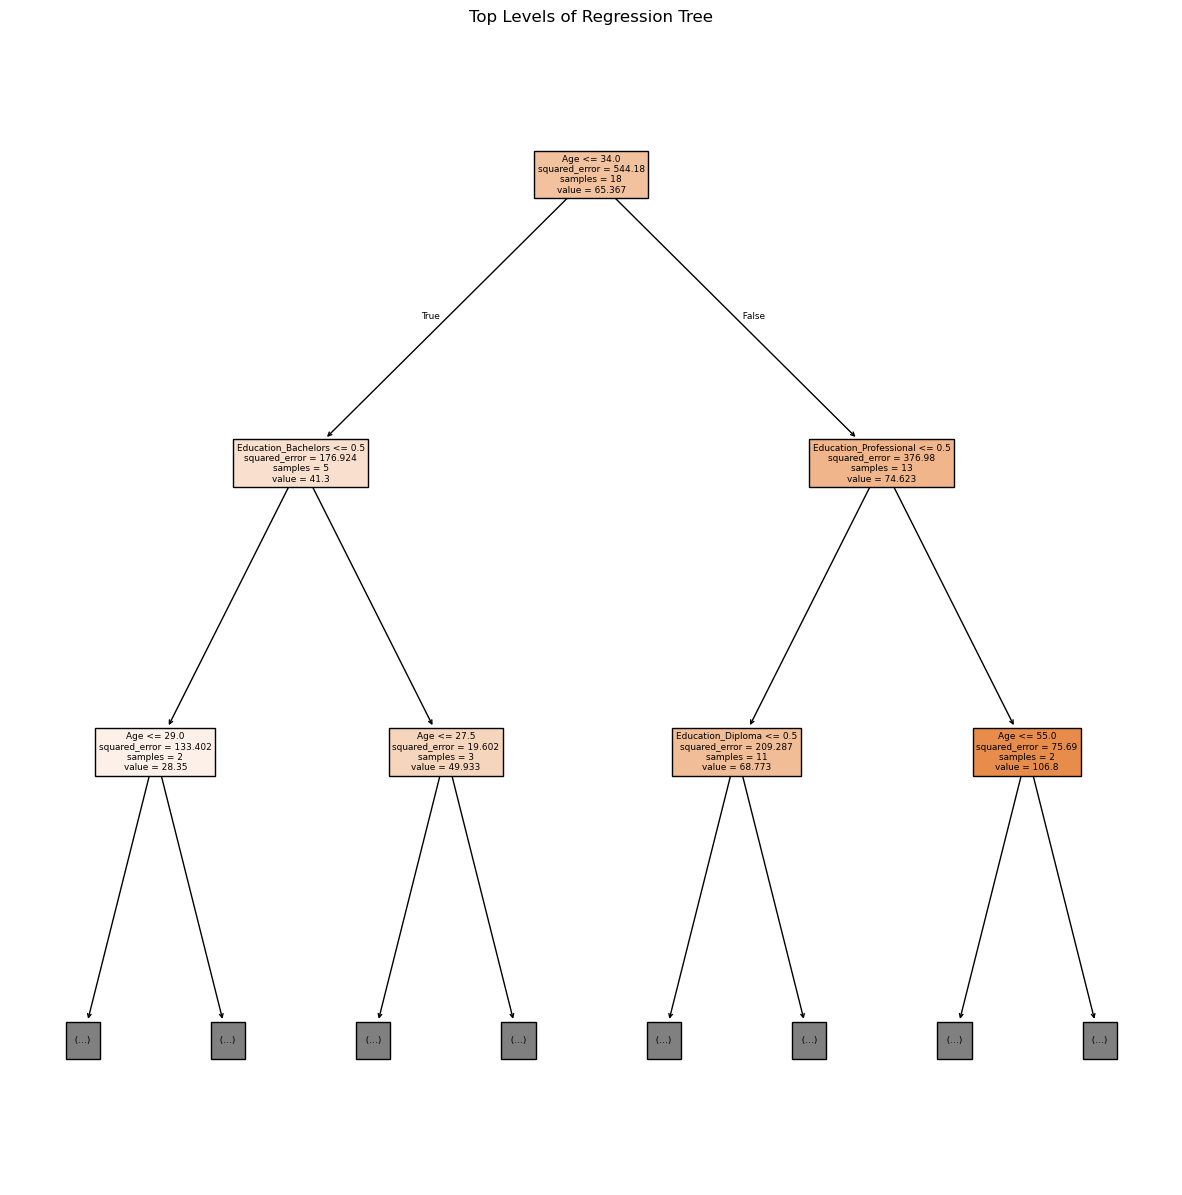

In [143]:
# Plot the regression tree with reduced depth = 2
plt.figure(figsize = (15,15))
tree.plot_tree(model,
               feature_names = list(X_train.columns),
               filled = True,
               max_depth = 2)
plt.title("Top Levels of Regression Tree")

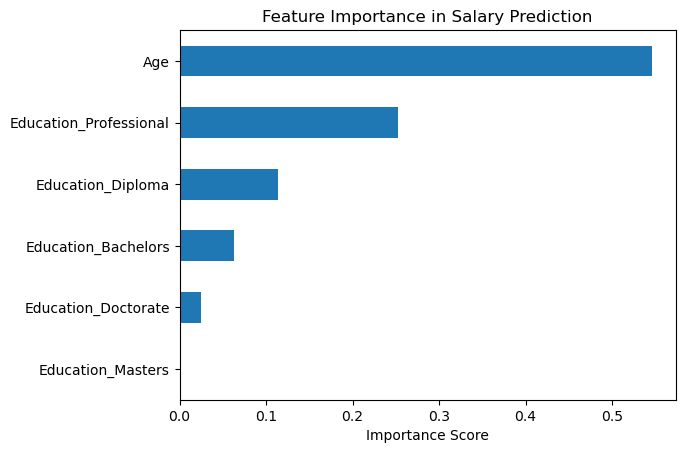

In [144]:
# Calculate and plot feature importance
feature_importance = pd.Series(regressor.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh')
plt.title("Feature Importance in Salary Prediction")
plt.xlabel("Importance Score")
plt.show()

## 6. Prune the Regression Tree

In [145]:
# Evaluate R-squared on the training set
train_score = regressor.score(X_train, y_train)
# Evaluate R-squared on the test set
test_score = regressor.score(X_test, y_test)

print(f"R-squared on training set: {train_score:.3f}")
print(f"R-squared on test set: {test_score:.3f}")

R-squared on training set: 0.990
R-squared on test set: 0.585


Let's get the list of effective alphas for the training data.

Next, we train several trees using the different values for alpha.

In [146]:
train_scores = []
test_scores = []

# Loop over each alpha and train a new model
for alpha in ccp_alphas:
    pruned_regressor = DecisionTreeRegressor(random_state=1234, ccp_alpha=alpha)
    pruned_regressor.fit(X_train, y_train)

    # Record R-squared scores for each alpha
    train_scores.append(pruned_regressor.score(X_train, y_train))
    test_scores.append(pruned_regressor.score(X_test, y_test))

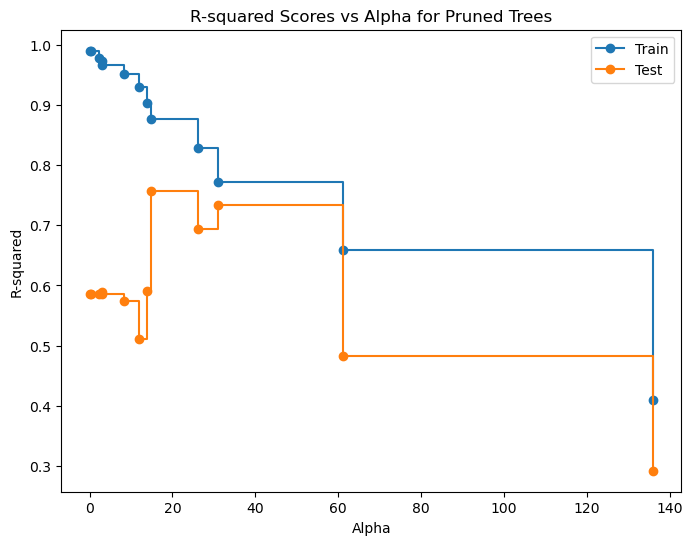

In [147]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label="Train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test", drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("R-squared")
plt.title("R-squared Scores vs Alpha for Pruned Trees")
plt.legend()
plt.show()

In [148]:
# Identify the optimal alpha
ix = test_scores.index(max(test_scores))
best_alpha = ccp_alphas[ix]
best_alpha

14.822500000000016

In [149]:
# Choose the optimal alpha (replace with the actual best alpha)
optimal_alpha = ccp_alphas[test_scores.index(max(test_scores))]

# Train the final pruned model
final_regressor = DecisionTreeRegressor(random_state=1234, ccp_alpha=optimal_alpha)
final_regressor.fit(X_train, y_train)

# Evaluate the pruned model
final_train_score = final_regressor.score(X_train, y_train)
final_test_score = final_regressor.score(X_test, y_test)

print(f"R-squared on training set (pruned): {final_train_score:.3f}")
print(f"R-squared on test set (pruned): {final_test_score:.3f}")

R-squared on training set (pruned): 0.877
R-squared on test set (pruned): 0.757


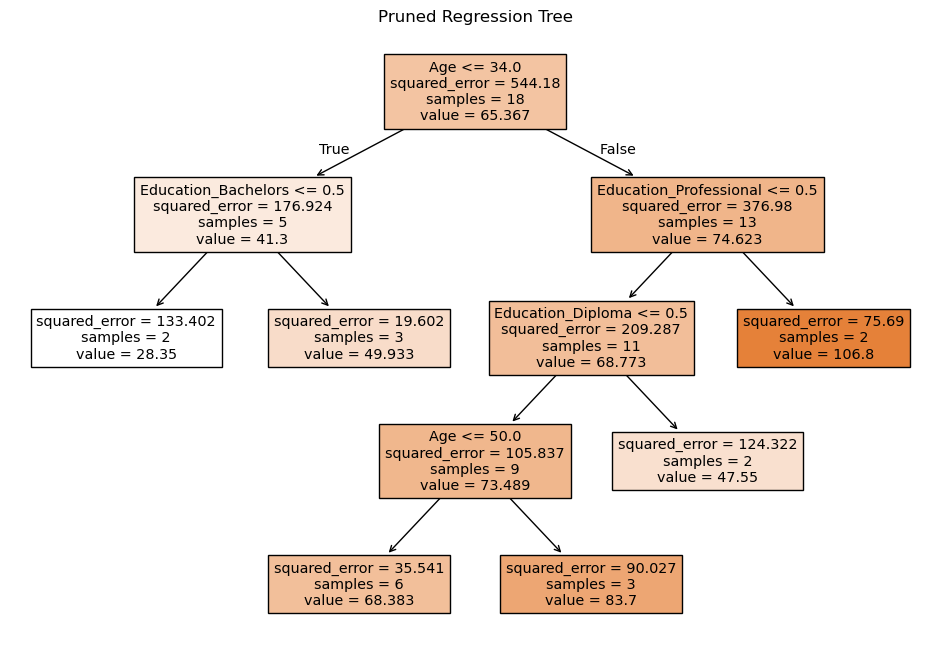

In [150]:
# Pruned Regression Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(final_regressor, feature_names=X_train.columns, filled=True)
plt.title("Pruned Regression Tree")
plt.show()